In [54]:
# the words are related to 'depression' and 'masennus' from top related words to depression in finnish language and english language

In [56]:
kw_lists =[['masennus oireet'], ['masennustesti'], ['masennus testi'], ['synnytyksen jälkeinen masennus'],
 ['masennus hoito'], ['ahdistus'], ['keskivaikea masennus'], ['psykoottinen masennus'], ['lapsen masennus'],
 ['vakava masennus'], ['depression'], ['vaikea masennus'], ['nuorten masennus'], ['raskaus masennus'],
 ['väsymys'], ['lievä masennus'], ['masennuslääkkeet'], ['mielenterveys'], ['nuoren masennus'], ['masennus blogi'],
 ['itsemurha'], ['masennus keskustelu'], ['psykoosi'], ['masennuksen hoito'], ['masennus itsehoito'],
 ['krooninen masennus'], ['kaksisuuntainen mielialahäiriö'], ['masennus keskustelu'], ['depression test'],
 ['depression symptoms'], ['manic depression'], ['postpartum depression'], ['crippling depression'],
 ['clinical depression'], ['high functioning depression']]
          

In [58]:
# from pytrends.request import TrendReq
# # timezone https://forbrains.co.uk/international_tools/earth_timezones; Finalnd time zone is 120
# pytrends = TrendReq(hl='en-US', tz=120, timeout=(10,25), retries=2, backoff_factor=0.1, requests_args={'verify':False})


In [65]:
import time
from time import sleep
from pytrends.request import TrendReq
import os
def scrape_gt(kw_lists, year, dirct): 
    path = dirct+f'/{year}'
    # Check whether the specified path exists or not
    isExist = os.path.exists(path)
    if not isExist:
      # Create a new directory because it does not exist 
      os.makedirs(path)
        
    # timezone https://forbrains.co.uk/international_tools/earth_timezones; Finalnd time zone is 120
    pytrends = TrendReq(hl='en-US', tz=120, timeout=(10,25), retries=2, backoff_factor=0.1, requests_args={'verify':False})
    
    for kw_list in kw_lists:      
        df_trends = pytrends.get_historical_interest(kw_list, year_start=year, month_start=1, day_start=1, hour_start=0, year_end=year, month_end=2, day_end=28, hour_end=23, cat=0, geo='FI', gprop='', sleep = 5)
        dirs = path+f'/{kw_list[0]}.csv'
        df_trends.to_csv(dirs)
        time.sleep(5)
        



In [40]:
!pwd

/c/Users/nafis/Documents/master_thesis_dir/thesis/notebooks


In [ ]:
# to have a view what it look like I will change the last month to 2 , just have two months for two words

In [66]:
dirct = 'c:/Users/nafis/Documents/master_thesis_dir/thesis'
year = 2020
kw_lists = kw_lists[:2]

In [67]:
scrape_gt(kw_lists, year, dirct)

C:\Users\nafis\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\nafis\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\nafis\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\nafis\Anaconda3\lib\site-packages\urllib3\c

C:\Users\nafis\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\nafis\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\nafis\Anaconda3\lib\site-packages\pytrends\request.py:506: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_df)
C:\Users\nafis\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to 

In [110]:
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
import pandas as pd
dirct = 'c:/Users/nafis/Documents/master_thesis_dir/thesis'
df = pd.read_csv(dirct+'/2020/masennus oireet.csv', parse_dates=['date'], index_col='date')
# tdi = pd.DatetimeIndex(df.index)
# df.set_index(tdi, inplace=True)
df = df.drop('isPartial',1)


C:\Users\nafis\AppData\Local\Temp\ipykernel_4288\644673662.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('isPartial',1)


In [106]:
df

,masennus oireet
date,
2020-01-01 00:00:00,0
2020-01-01 01:00:00,0
2020-01-01 02:00:00,0
2020-01-01 03:00:00,0
2020-01-01 04:00:00,0
...,...
2020-02-28 19:00:00,0
2020-02-28 20:00:00,0
2020-02-28 21:00:00,0


In [119]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=90, fontsize=15)
    plt.show()

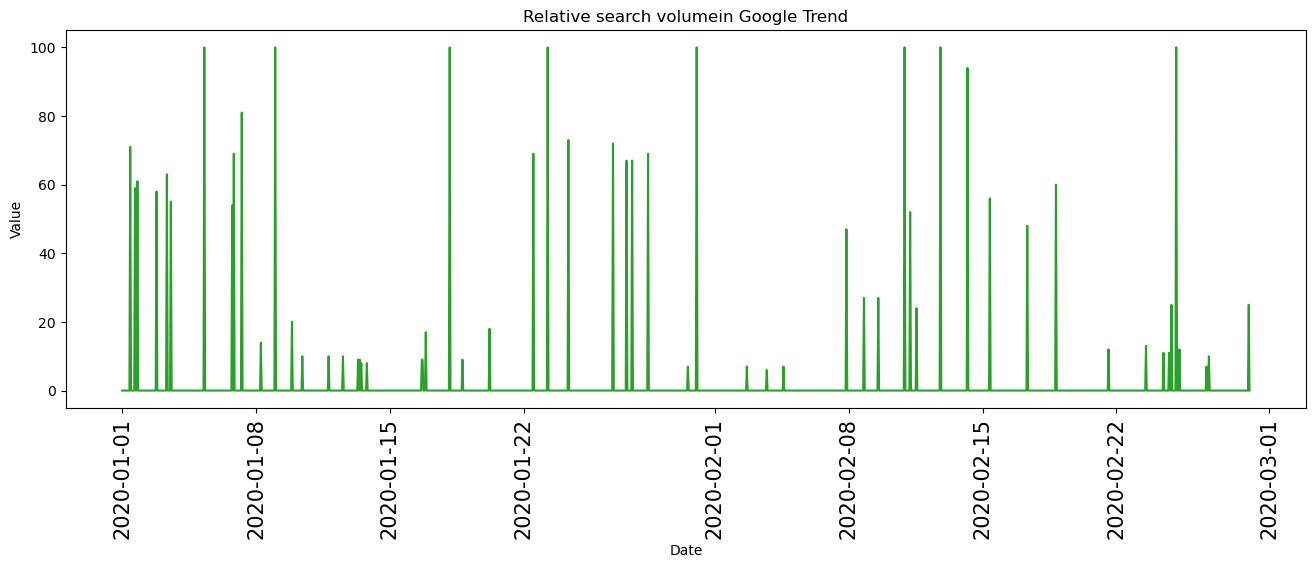

In [120]:
plot_df(df,x=df.index,title= 'Relative search volumein Google Trend' ,y=df['masennus oireet'])

In [ ]:
## lets go for all data

In [126]:
directory = 'c:/Users/nafis/Documents/master_thesis_dir/thesis/google_trend_data/GT_update/cleaned_data/2015/_depression_2015.csv'

In [127]:
df_depression_2015 = pd.read_csv(directory, parse_dates=['date'], index_col='date')



In [128]:
df_depression_2015

,depression
date,
2015-01-01 00:00:00,14
2015-01-01 01:00:00,36
2015-01-01 02:00:00,52
2015-01-01 03:00:00,20
2015-01-01 04:00:00,11
...,...
2015-12-31 19:00:00,8
2015-12-31 20:00:00,14
2015-12-31 21:00:00,16


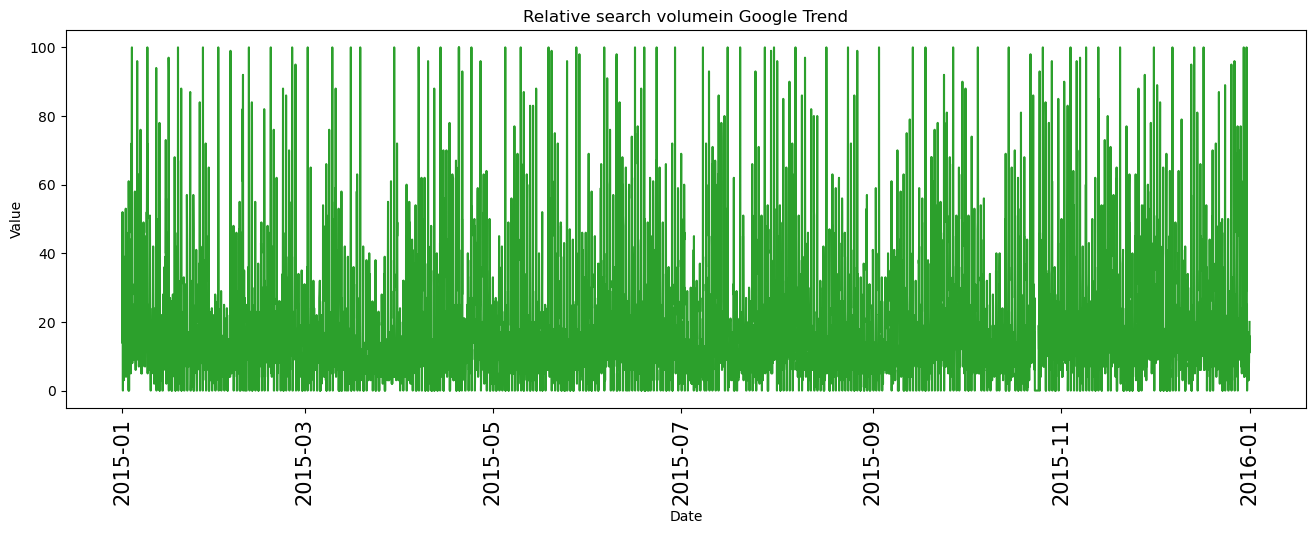

In [129]:
plot_df(df_depression_2015,x=df_depression_2015.index,title= 'Relative search volumein Google Trend' ,y=df_depression_2015['depression'])

In [215]:
# for 6 years for word 'depression'
word = 'depression'
directory = f'https://raw.githubusercontent.com/nafis-git/Googgle_trend_data_analysis/main/data/_{word}.csv'
df=pd.read_csv(directory, parse_dates=['date'], index_col='date')
df = df.drop(['date_index'],1)

C:\Users\nafis\AppData\Local\Temp\ipykernel_4288\918068210.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['date_index'],1)


In [216]:
df.reset_index(inplace=True)
df

,date,depression
0,2015-01-01 00:00:00,14
1,2015-01-01 01:00:00,36
2,2015-01-01 02:00:00,52
3,2015-01-01 03:00:00,20
4,2015-01-01 04:00:00,11
...,...,...
52268,2020-12-31 19:00:00,8
52269,2020-12-31 20:00:00,12
52270,2020-12-31 21:00:00,20
52271,2020-12-31 22:00:00,17


In [202]:
df.columns

Index(['date', 'depression'], dtype='object')

In [204]:
df.columns = ['date','value']

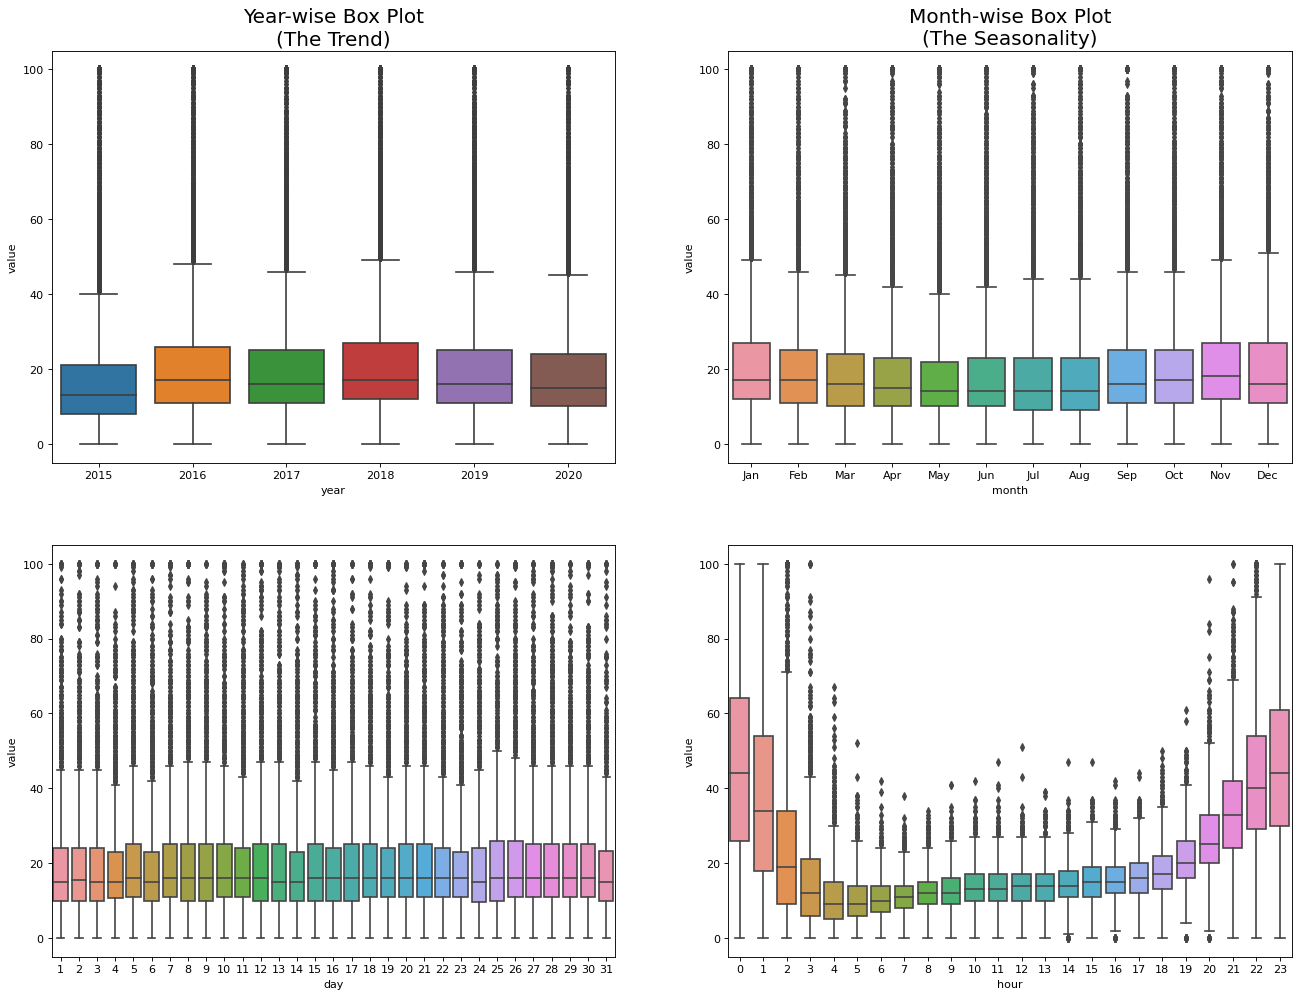

In [205]:
import seaborn as sns
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
df['day'] = [d.day for d in df.date]
df['hour'] = [d.hour for d in df.date]

years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(2, 2, figsize=(20,15), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0,0])
sns.boxplot(x='month', y='value', data=df, ax=axes[0,1])
sns.boxplot(x='day', y='value', data=df, ax=axes[1,0])
sns.boxplot(x='hour', y='value', data=df, ax=axes[1,1])

# Set Title
axes[0,0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[0,1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()